In [51]:
import networkx as nx
import gurobipy as gb
import matplotlib.pyplot as plt

In [52]:
G = nx.Graph()

nodes = [0, 1, 2, 3, 4, 5]
edges = [(0,1), (0,5), (1,5), (5,4), (1,2), (2,4), (4,3)]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

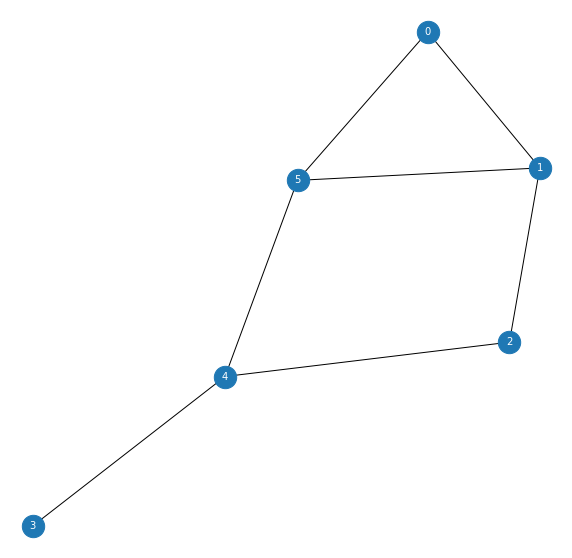

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pos = nx.spring_layout(G, seed=20)
nx.draw(G, pos, ax, with_labels=True, node_size=500, font_size=10, font_color='w')

In [54]:
min_vertCov = gb.Model()

#Variables 

x = min_vertCov.addVars(G.number_of_nodes(), vtype=gb.GRB.BINARY, name='x')
min_vertCov.setObjective(x.sum(),sense=gb.GRB.MINIMIZE)

min_vertCov.update()
min_vertCov.write('min_VertCov.lp')


In [55]:
# Constraints

for i,j in G.edges():
    min_vertCov.addConstr(x[i] + x[j] >= 1, name='edge')

min_vertCov.update()
min_vertCov.write('min_VertCov.lp')

In [56]:
min_vertCov.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 7 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x38770c9c
Variable types: 0 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.0000000
Presolve removed 7 rows and 6 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds
Thread count was 1 (of 12 available processors)

Solution count 1: 3 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%


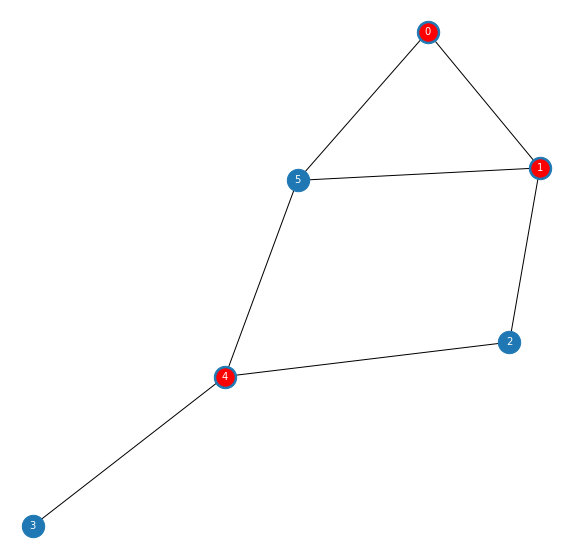

In [58]:
vertexNodes = list()

for i in G.nodes():
    if (x[i].x > 1e-6):
        vertexNodes.append(i)


fig, ax = plt.subplots(1, 1, figsize=(10,10))
nx.draw(G, pos, ax, with_labels=True, node_size=500, font_size=10, font_color='w')
nx.draw_networkx_nodes(G, pos, nodelist=vertexNodes, node_color ='r')